Motivation:
I wish to dissect the Twitter discourse surrounding fast fashion to better understand the environmental, social, and cultural issues associated with the industry. Fast fashion is a complicated industry which exploits many aspects of human life. I am specifically interested in how it is entangled with environmentalism, socioeconomic inequality, consumerism, human rights, and fashion culture. My research questions focus on examining how people discuss fast fashion on Twitter through qualitative and quantitative research, such as:
1. What is the discourse surrounding the advocacy and criticism concerning fast fashion?
2. How do American attitudes towards culture, capitalism, and environmentalism influence attitudes towards practices of fast fashion production and consumption?

Dataset:
In sourcing my dataset, I used snscrape in Python to scrape tweets from Twitter with the search term "fast fashion". 

In [193]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import nltk

from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')
nltk.download('opinion_lexicon')


[nltk_data] Downloading package punkt to /Users/macbook/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     /Users/macbook/nltk_data...
[nltk_data]   Package opinion_lexicon is already up-to-date!


True

Data Exploratory Analysis Section

In [198]:
fashion = pd.read_csv("fastfashion_cleaned_subset.csv")
fashion.head()

,Unnamed: 0,X_type,url,date,rawContent,renderedContent,id,replyCount,retweetCount,likeCount,...,source_device,sourceLabel,retweetedTweet,inReplyToTweetId,longitude,latitude,hashtags,cashtags,viewCount,vibe
0,1,snscrape.modules.twitter.Tweet,https://twitter.com/Alan_S_Morrison/status/162...,2023-02-03 20:31:01+00:00,The only reason I can think of for why people ...,The only reason I can think of for why people ...,1.621607e+18,0,0,0,...,Android,Twitter for Android,NaN,NaN,NaN,NaN,['CarColours'],NaN,49.0,NaN
1,2,snscrape.modules.twitter.Tweet,https://twitter.com/LiveSlowDyeFast/status/162...,2023-02-03 20:19:19+00:00,The early 2000s has to be the worst period in ...,The early 2000s has to be the worst period in ...,1.621604e+18,0,0,0,...,iPhone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN
2,3,snscrape.modules.twitter.Tweet,https://twitter.com/FalkAppreciator/status/162...,2023-02-03 20:00:05+00:00,Deciding to become a Hypebeast. No thoughts. O...,Deciding to become a Hypebeast. No thoughts. O...,1.621599e+18,0,0,0,...,iPhone,Twitter for iPhone,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN
3,4,snscrape.modules.twitter.Tweet,https://twitter.com/otherlindseyy/status/16215...,2023-02-03 19:44:32+00:00,"And as a plus size person, the only places we ...","And as a plus size person, the only places we ...",1.621596e+18,0,0,1,...,Android,Twitter for Android,NaN,NaN,NaN,NaN,NaN,NaN,9.0,NaN
4,5,snscrape.modules.twitter.Tweet,https://twitter.com/Miao993306/status/16215919...,2023-02-03 19:30:25+00:00,The amount of people defending their over cons...,The amount of people defending their over cons...,1.621592e+18,0,0,0,...,Twitter Web App,Twitter Web App,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN


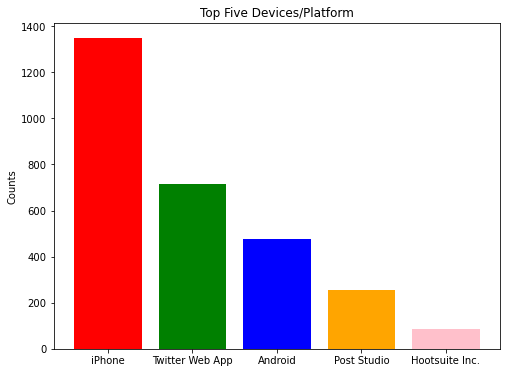

In [199]:
fashion["source_device"].value_counts()

device = ['iPhone', 'Twitter Web App', 'Android', 'Post Studio', 'Hootsuite Inc.']
count_device = [1348, 715, 477, 256, 87]
colors = ['red', 'green', 'blue', 'orange', "pink"]

plt.figure(figsize=(8, 6))
plt.bar(device, count_device, color = colors)
plt.ylabel('Counts')
plt.title('Top Five Devices/Platform')
plt.show()

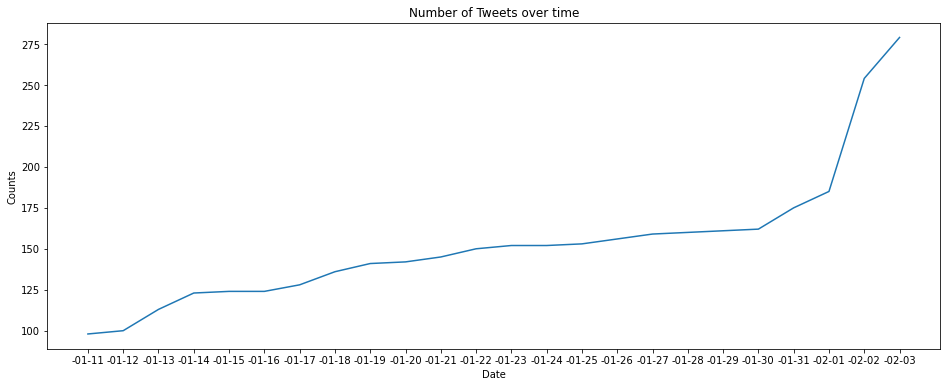

In [200]:
date_simplified = []
for date in fashion["date"]:
    date_simplified.append(date[4:10])
fashion["date_simplified"] = date_simplified

date = fashion["date_simplified"].unique()
date_1 = date[::-1]
counts = fashion["date_simplified"].value_counts()
counts_1 = counts[::-1]

fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(date_1, counts_1)
ax.set_xlabel('Date')
ax.set_ylabel('Counts')
ax.set_title('Number of Tweets over time')
plt.show()

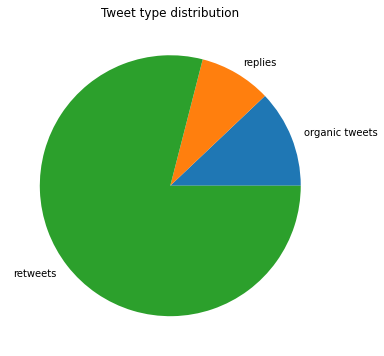

In [202]:
tweets_type = ['organic tweets', 'replies', 'retweets']
tweets_type_counts = [12.08, 8.92, 79]
plt.figure(figsize=(8, 6))
plt.pie(tweets_type_counts, labels = tweets_type)
plt.title('Tweet type distribution')
plt.show()

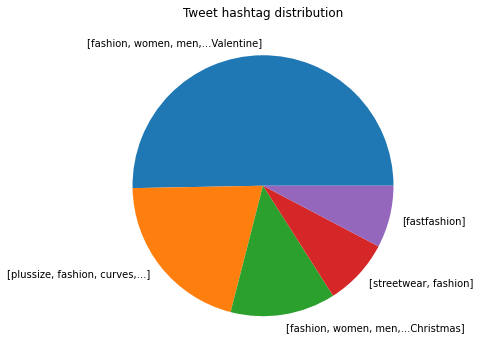

In [206]:
fashion["hashtags"].value_counts()[0:5]

hashtag_type = ['[fashion, women, men,...Valentine]', '[plussize, fashion, curves,...]', '[fashion, women, men,...Christmas]',
               '[streetwear, fashion]',  '[fastfashion]']
hashtag_type_counts = [85, 35, 22, 14, 13]
plt.figure(figsize=(8, 6))
plt.pie(hashtag_type_counts, labels = hashtag_type)
plt.title('Tweet hashtag distribution')
plt.show()

Analysis Section

In [142]:
sentiment = []
sentiment_type = []
analyzer = SentimentIntensityAnalyzer()

for text in fashion['rawContent']:
    scores = analyzer.polarity_scores(text)
    if scores['compound'] > 0.5:
        sentiment_type.append("positive")
    elif scores['compound'] < -0.5:
        sentiment_type.append("negative")
    else:
        sentiment_type.append("neutral")     
    sentiment.append(scores['compound'])
fashion['compound'] = sentiment
fashion['sentiment'] = sentiment_type

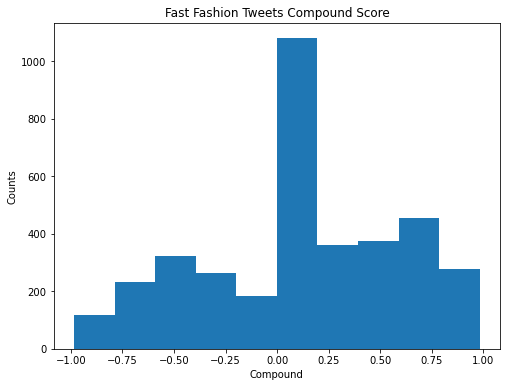

In [148]:
plt.figure(figsize=(8, 6))
fashion['compound'].plot(kind = "hist")
plt.xlabel('Compound')
plt.ylabel('Counts')
plt.title('Fast Fashion Tweets Compound Score')
plt.show()

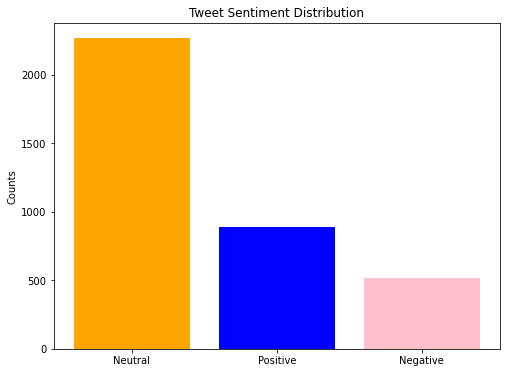

In [149]:
fashion['sentiment'].value_counts()

sentiment = ['Neutral', 'Positive', 'Negative']
sentiment_count = [2265, 888, 519]
colors = ['orange', 'blue', "pink"]

plt.figure(figsize=(8, 6))
plt.bar(sentiment, sentiment_count, color = colors)
plt.ylabel('Counts')
plt.title('Tweet Sentiment Distribution')
plt.show()

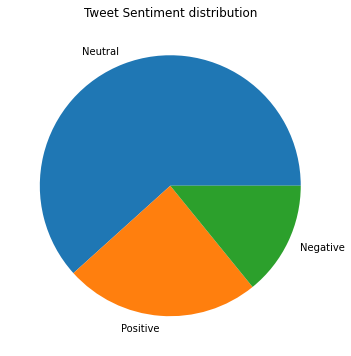

In [156]:
plt.figure(figsize=(8, 6))
plt.pie(sentiment_count, labels = sentiment)
plt.title('Tweet Sentiment distribution')
plt.show()

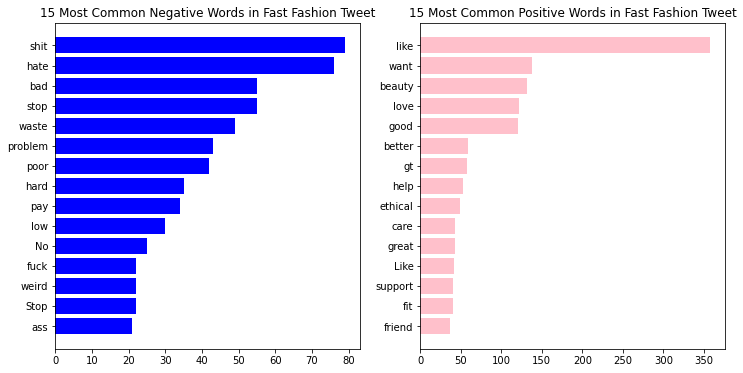

In [46]:
positive_words = []
negative_words = []
stop_words = stopwords.words('english')

for text in fashion['rawContent']:
    for word in word_tokenize(text):
        score = analyzer.polarity_scores(word)['compound']
        if score > 0:
            positive_words.append(word)
        elif score < 0:
            negative_words.append(word)

from nltk import FreqDist

negative_words_nostop = [word for word in negative_words if word not in stop_words]
positive_words_nostop = [word for word in positive_words if word not in stop_words]

negative_words_fd_nostop = FreqDist(negative_words_nostop)
positive_words_fd_nostop = FreqDist(positive_words_nostop)

most_common_negative_nostop = negative_words_fd_nostop.most_common(15)
most_common_positive_nostop = positive_words_fd_nostop.most_common(15)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

ax2.barh([word for (word, count) in most_common_positive_nostop], [count for (word, count) in most_common_positive_nostop], color='pink')
ax2.set_title('15 Most Common Positive Words in Fast Fashion Tweet')
ax2.invert_yaxis()

ax1.barh([word for (word, count) in most_common_negative_nostop], [count for (word, count) in most_common_negative_nostop], color='blue')
ax1.set_title('15 Most Common Negative Words in Fast Fashion Tweet')
ax1.invert_yaxis()

plt.show()         